<a href="https://colab.research.google.com/github/koumudi-panguluri/MNIST/blob/master/MNIST_(KERAS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist


Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#print(image_shape)

In [0]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]
image_shape=(img_rows,img_cols,1)
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],x_test[0].shape[0],x_test[1].shape[0],1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
import keras.utils
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [0]:
print(y_test[0].shape[0])

10


In [0]:
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten
from keras import backend as K
from keras.models import Sequential
from keras.optimizers import SGD

In [0]:
num_classes=y_test[0].shape[0]
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=image_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.5925 - acc: 0.8144 - val_loss: 0.1956 - val_acc: 0.9423
Epoch 2/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.3006 - acc: 0.9087 - val_loss: 0.1396 - val_acc: 0.9567
Epoch 3/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.2269 - acc: 0.9323 - val_loss: 0.1101 - val_acc: 0.9664
Epoch 4/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1767 - acc: 0.9476 - val_loss: 0.0877 - val_acc: 0.9730
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1431 - acc: 0.9571 - val_loss: 0.0677 - val_acc: 0.9796
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1232 - acc: 0.9628 - val_loss: 0.0584 - val_acc: 0.9823
Epoch 7/10
60000/60000 [===

In [0]:
score=model.evaluate(x_test,y_test,verbose=0)
print("LOSS : ", score[0])
print("ACCURACY : ", score[1])

LOSS :  0.04082589428985957
ACCURACY :  0.9875


In [0]:
from keras.models import load_model
model.save('C:\\Users\\koumudi\\DeepLearningCV\\My practice\\images\\mnistByMe.h5')

In [0]:
from keras.models import load_model
classifier=load_model('C:\\Users\\koumudi\\DeepLearningCV\\My practice\\images\\mnistByMe.h5')

3


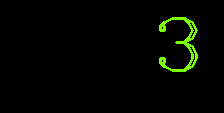

4


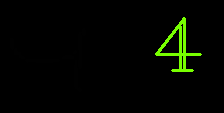

2


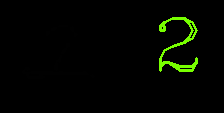

8


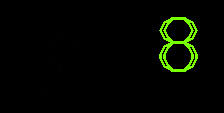

8


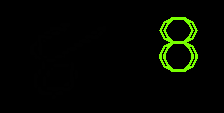

0


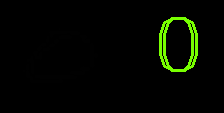

9


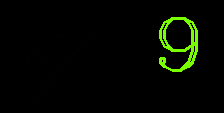

0


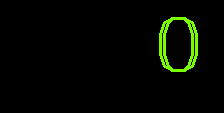

6


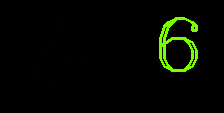

3


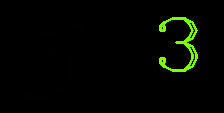

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def draw_test(name,pred,image_im):
    e=cv2.copyMakeBorder(image_im,1,0,0,img.shape[0],cv2.BORDER_CONSTANT,value=[0,0,0])
    e=cv2.cvtColor(e,cv2.COLOR_GRAY2BGR)
    cv2.putText(e,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,120),2)
    cv2_imshow(e)
    
for i in range(0,10):
    random=np.random.randint(0,len(x_test))
    image_im=x_test[random]
    print(y_test[random].argmax(axis=0))
    img=cv2.resize(image_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    image_im=image_im.reshape(1,28,28,1)
    res=(classifier.predict_classes(image_im,1,verbose=0)[0])
    draw_test('Prediction',res,img)
    cv2.waitKey(0)
cv2.destroyAllWindows()


In [0]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict_classes(x_test)
#print(classification_report(np.argmax(y_pred),y_test))
#print(confusion_matrix(np.argmax(y_pred),y_test))

In [0]:
'''
from keras.callbacks import ModelCheckpoints
checkpoint=ModelCheckpoints('./path',mode='min',monitor="val_loss",save_best_only=True,verbose=1)
callbacks=[callbacks]
#use callbacks while fitting
'''
'''
from keras.callbacks import EarlyStopping
EarlyStopping(monitor="val_loss",min_delta=0, patience=3,verbose=1,restore_best_weights=True)
callbacks=[callbacks]
'''


'\nfrom keras.callbacks import EarlyStopping\nEarlyStopping(monitor="val_loss",min_delta=0, patience=3,verbose=1,restore_best_weights=True)\ncallbacks=[callbacks]\n'